In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head()
#print(df.shape)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.duplicated().sum()

0

In [6]:
df["Exited"].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [7]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [8]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [9]:
df.drop(columns=['RowNumber','CustomerId','Surname'] , inplace=True)

In [10]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
df = pd.get_dummies(df,columns=['Geography','Gender'] , drop_first=True ,dtype=int)

In [12]:
X = df.drop(columns=['Exited'])
y = df['Exited'].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [13]:
X_train.shape

(8000, 11)

In [14]:
y

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit(X_test)

In [16]:
X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [17]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [18]:
model = Sequential()

model.add( Dense(11,activation='relu' ,input_dim=11) )
model.add( Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

C:\Users\aman1\anaconda3\envs\TF\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [21]:
history = model.fit( X_train_scaled,y_train,epochs=100, validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4504 - loss: 0.7979 - val_accuracy: 0.7975 - val_loss: 0.5165
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 813us/step - accuracy: 0.8004 - loss: 0.4944 - val_accuracy: 0.8006 - val_loss: 0.4575
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 772us/step - accuracy: 0.8055 - loss: 0.4433 - val_accuracy: 0.8106 - val_loss: 0.4333
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 748us/step - accuracy: 0.8144 - loss: 0.4253 - val_accuracy: 0.8188 - val_loss: 0.4207
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 795us/step - accuracy: 0.8257 - loss: 0.4104 - val_accuracy: 0.8244 - val_loss: 0.4060
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 772us/step - accuracy: 0.8442 - loss: 0.3802 - val_accuracy: 0.8338 - val_loss: 0.3914
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 730us/step - accuracy: 0.8367 - loss: 0.3880 - val_accuracy: 0.8413 - val_loss: 0.3798
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 755us/step - accuracy: 0.8505 - loss: 0.3

In [22]:
print(model.layers[0].get_weights())
print()
print()
print(model.layers[1].get_weights())

[array([[ 0.3546684 ,  0.02675646, -0.36711776,  0.10581878, -0.120515  ,
         0.38595793, -0.06152368, -0.00526781,  0.07901054, -0.36207715,
        -0.32898116],
       [-0.77259266,  0.8453877 , -0.52784467, -0.15931274,  0.92261153,
         0.50819093,  0.3267572 ,  0.02088728,  0.49200156,  0.20512359,
        -0.36682606],
       [-0.19174257,  0.13791524,  0.3751533 ,  0.10590832,  0.05834831,
        -0.03306386,  0.02411185,  0.24964653,  0.27804285, -0.1473408 ,
         0.10400651],
       [ 0.2804825 ,  0.21904194,  0.04233838,  0.22621311, -0.52916825,
         0.16782454,  0.8156121 , -0.3423677 , -0.25953737, -0.06788338,
        -0.13225727],
       [ 0.34684727, -0.02027373, -0.14180803,  0.23728767, -0.674931  ,
        -0.7789042 ,  0.9279317 ,  1.3281724 ,  0.2166576 , -0.15829009,
        -0.05745486],
       [-0.35962915,  0.16328022,  0.2927628 ,  0.5989624 , -0.31819   ,
         0.07807246, -0.2055365 , -0.14077777, -0.03632853, -0.37959838,
        -0.20

In [23]:
y_log = model.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 831us/step


In [24]:
y_pred = np.where( y_log>0.5 , 1, 0)

In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test , y_pred)

0.4655

In [26]:
import matplotlib.pyplot as plt

In [27]:
history.history

{'accuracy': [0.6182812452316284,
  0.797656238079071,
  0.8106250166893005,
  0.8217187523841858,
  0.8296874761581421,
  0.83984375,
  0.8435937762260437,
  0.8493750095367432,
  0.8501562476158142,
  0.8520312309265137,
  0.852343738079071,
  0.8545312285423279,
  0.8559374809265137,
  0.8535937666893005,
  0.8553125262260437,
  0.854687511920929,
  0.8568750023841858,
  0.8582812547683716,
  0.8567187786102295,
  0.8584374785423279,
  0.8584374785423279,
  0.8589062690734863,
  0.860156238079071,
  0.8614062666893005,
  0.8606250286102295,
  0.8614062666893005,
  0.8614062666893005,
  0.8631250262260437,
  0.862500011920929,
  0.8615624904632568,
  0.8617187738418579,
  0.8621875047683716,
  0.8606250286102295,
  0.8629687428474426,
  0.8631250262260437,
  0.8635937571525574,
  0.8623437285423279,
  0.8646875023841858,
  0.8628125190734863,
  0.8614062666893005,
  0.8635937571525574,
  0.8637499809265137,
  0.8642187714576721,
  0.8635937571525574,
  0.8635937571525574,
  0.8639062

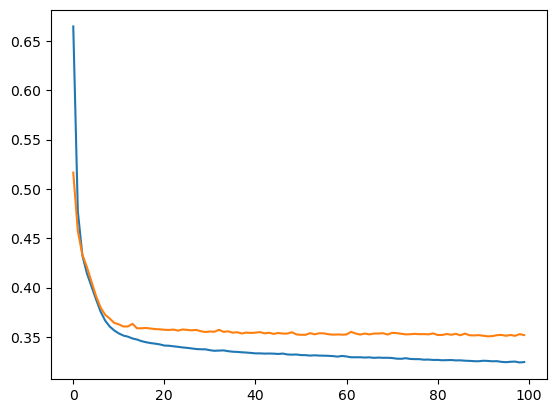

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

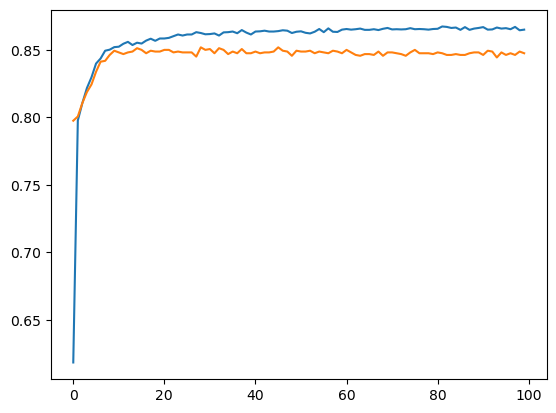

In [29]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])